In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
details = pd.read_csv("Details.csv")
placement = pd.read_csv("Placement.csv")

In [3]:
merged = pd.merge(details,placement, on='Roll No.', how='outer')
merged.head()

,Roll No.,Age,Weight,Branch,Gender,SSC Result,HSC Result,Diploma Result,Sem 1,Sem 2,Sem 3,Sem 4,Sem 5,Sem 6,Avg SPI,CPI,Placed
0,201,21,78,MBA,Male,86.16,93.60,NaN,9.58,9.17,9.40,8.70,9.42,9.42,9.28,9.23,yes
1,202,21,72,MBA,Male,95.50,86.92,NaN,9.53,9.07,9.40,9.04,9.00,8.85,9.15,9.07,yes
2,203,21,80,MBA,Male,92.50,88.46,NaN,9.36,9.53,9.16,8.96,9.00,9.00,9.17,9.03,no
3,204,20,75,BCA,Male,82.66,75.38,NaN,9.58,9.43,9.52,8.52,8.42,8.96,9.07,8.85,no
4,205,20,61,BCA,Female,91.00,79.07,NaN,9.25,8.93,9.12,8.48,8.38,8.81,8.83,8.70,no


In [4]:
cols = merged.columns[merged.isnull().any(axis=0)]
cols

Index(['HSC Result', 'Diploma Result', 'Sem 2', 'Sem 3', 'Sem 4', 'CPI'], dtype='object')

In [6]:
merged['HSC Result'].fillna(80,inplace=True)
merged['Sem 3'].fillna(8,inplace=True)
merged['Sem 2'].fillna(8,inplace=True)
merged['Sem 4'].fillna(8,inplace=True)
merged['CPI'].fillna(8,inplace=True)
merged

,Roll No.,Age,Weight,Branch,Gender,SSC Result,HSC Result,Diploma Result,Sem 1,Sem 2,Sem 3,Sem 4,Sem 5,Sem 6,Avg SPI,CPI,Placed
0,201,21,78,MBA,Male,86.16,93.60,NaN,9.58,9.17,9.40,8.70,9.42,9.42,9.28,9.23,yes
1,202,21,72,MBA,Male,95.50,86.92,NaN,9.53,9.07,9.40,9.04,9.00,8.85,9.15,9.07,yes
2,203,21,80,MBA,Male,92.50,88.46,NaN,9.36,9.53,9.16,8.96,9.00,9.00,9.17,9.03,no
3,204,20,75,BCA,Male,82.66,75.38,NaN,9.58,9.43,9.52,8.52,8.42,8.96,9.07,8.85,no
4,205,20,61,BCA,Female,91.00,79.07,NaN,9.25,8.93,9.12,8.48,8.38,8.81,8.83,8.70,no
5,206,21,78,MBA,Male,91.00,74.46,NaN,9.02,8.83,9.16,8.22,8.79,8.65,8.78,8.70,yes
6,207,21,72,BCA,Male,89.00,79.53,NaN,9.13,8.93,9.40,8.04,8.00,9.04,8.76,8.62,yes
7,208,22,80,MBA,Male,78.83,78.15,NaN,9.40,8.87,9.00,8.37,8.38,8.42,8.74,8.00,yes
8,209,22,75,BCA,Male,93.67,81.23,NaN,8.76,9.07,8.60,8.19,8.38,8.81,8.64,8.49,yes
9,210,21,80,MBA,Male,93.00,83.53,NaN,8.80,8.93,9.12,7.85,8.58,8.42,8.62,8.48,yes


In [7]:
X = np.array(merged[['Sem 3','Sem 4','Sem 5','Sem 6']])
y = np.array(merged['CPI']).reshape(-1,1)

In [8]:
print(X.shape)
print(y.shape)

(35, 4)
(35, 1)


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
model = LinearRegression()
model

LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred

array([[7.37829245],
       [8.17681184],
       [7.84924417],
       [7.86942376],
       [8.26559911],
       [6.99963228],
       [8.19161682]])

In [14]:
model.score(X_test,y_test)

0.9351578802161373

ValueError: x and y must be the same size

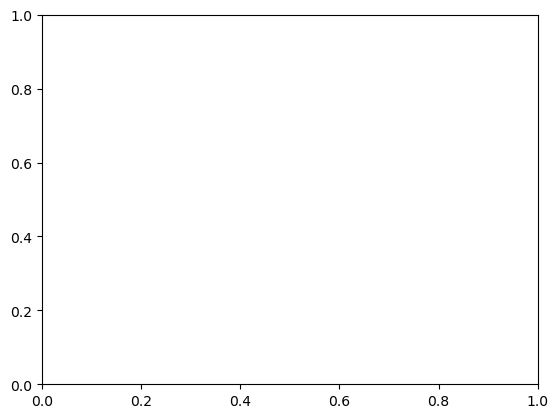

In [15]:
plt.scatter(X_test,y_test, color='blue',label='acutal')
plt.plot(X_test,y_test,color='red')

In [17]:
nn=model.predict([[10,10,10,10]])
nn

array([[9.7206234]])